# Final Project
**AI Tools 2611**  
**Evan Roegner, Alex Ewart**

This notebook is designed to be run on ROSIE

In [ ]:
import tensorflow as tf

import os
import pathlib
import time
import datetime
import cv2
import numpy as np
import os
import tarfile
import numpy as np
from keras.preprocessing import image
import cv2 as cv
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import GridSearchCV, train_test_split
from skimage.io import imread
import pandas as pd
import warnings

from matplotlib import pyplot as plt
from IPython import display
#!pip install memory_profiler #gpt


for reference, delete later:  
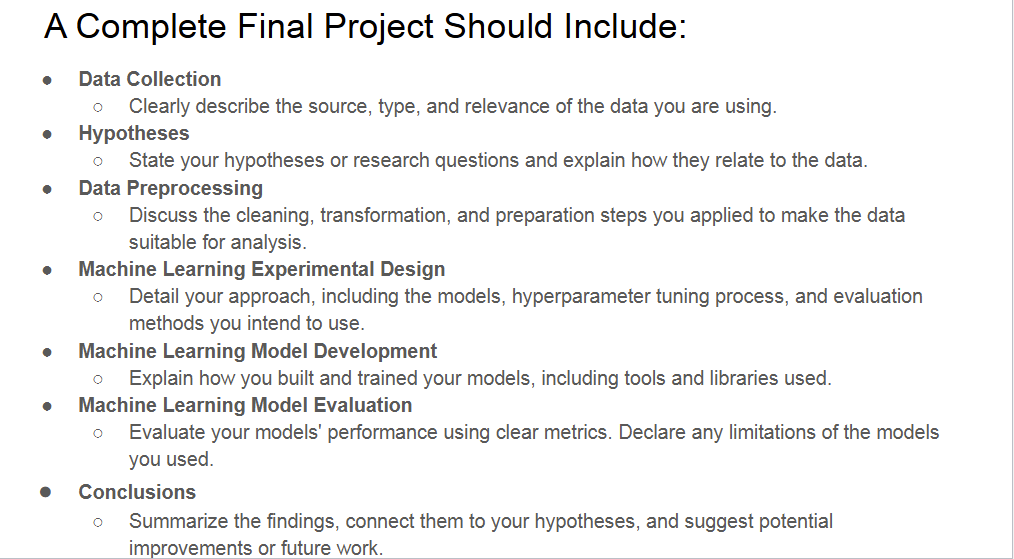

---
### Data Collection
Our images come from two sources.
1) A dataset of hamster images found here: https://images.cv/dataset/hamster-image-classification-dataset
2) A dataset of general images found here: https://www.kaggle.com/datasets/dimensi0n/imagenet-256 

Additionally, we used code for a conditional generative adversarial network (cGAN) from TensorFlow called pix2pix: https://www.tensorflow.org/tutorials/generative/pix2pix   

---

### Research Questions/Hypothesis
**Can a KNN classifier accuratly identify if an image contains a hamster?**  
Through cross-validation and hyperparameter tuning, we will be able to achieve 80% recall in identifying hamsters. Trained differently, we will be able to achieve 80% presicion.  
**Can a cGAN given a dataset of hamsters be used to generate a new hamster?**  
Through hyperparameter tuning the cGAN will be able to generate images that are identifiable as hamsters.  

---

### Contributions
Evan implemented part 1, Alex implemented part 2

---

### Data Preprocessing
All of our images have been downloaded as 256 x 256. To make sure the general dataset had no images of hamsters, we deleted them from the Kaggle dataset. The downloaded general images had many categories, and we wanted a large variety of images, so of the 8 gigabytes of images in the dataset, we used a script to select an equal amount from every category.  
  
The hamster images were downloaded with variations of the photos including blurriness and random pixle swaps. Before training the cGAN, Alex manually traced the edges of the hamster dataset to get a set of pngs, to make sure the output generations only had hamsters in them. For the cGAN only, pngs that didn't clearly have a hamster in them were removed.

---


In [ ]:
#load data
hamster_folder = "hamster"
not_hamster_folder = "not_hamster"
hamster_folder_png = "hamster_png"

def unzip(folder_name):
    import zipfile as zf
    with zf.ZipFile(f"{folder_name}.zip", 'r') as files:
        files.extractall()

unzip(hamster_folder)
unzip(not_hamster_folder)
unzip(hamster_folder_png)

#unzip hamsters
def unzip(folder):
    import zipfile as zf
    print("un")
    files = zf.ZipFile(f"{folder}.zip", 'r')
    files.extractall()
    files.close()
unzip(hamster_folder)
unzip(not_hamster_folder)


# Part 1: KNN
---
### Experimental Design
TODO

### Model Development
TODO

In [ ]:
# build model here (functions, call for both recall and presicion models)

In [ ]:
#TODO: COMPLETELY UNEDITED KNN CODE I FOUND ONLINE:

In [ ]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 30*30 + 1)

In [ ]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"
    images = []
    flat_data = []
    target = []
    count = 0
    train_img = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            count += 1
            img = imread(file)
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
            img_pred = image.img_to_array(img_pred)
            img_pred = img_pred / 255
            train_img.append(img_pred)

    X = np.array(train_img)

    return X

X = []
X = load_image_files("data/train")

y0 = np.zeros(2000)
#2000 is the number of Cats in X
y1 = np.ones(2134)
#2134 is the number of Dogs in X
y = []
y = np.concatenate((y0,y1), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5)
print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

from builtins import range
from builtins import object

num_training = X_train.shape[0]
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = X_test.shape[0]
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

num_val = X_val.shape[0]
mask = list(range(num_val))
X_val = X_val[mask]
y_val = y_val[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))

print("X_train: "+str(X_train.shape))
print("X_test: "+str(X_test.shape))
print("X_val: "+str(X_val.shape))
print("y_train: "+str(y_train.shape))
print("y_test: "+str(y_test.shape))
print("y_val: "+str(y_val.shape))

In [ ]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def predict_label(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

    def train(self, X, y):
        """
        Train the classifier. For k-nearest neighbors this is just
        memorizing the training data.

        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1):
        """
        Predict labels for test data using this classifier.

        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        dists = self.compute_distances_no_loops(X)

        return self.predict_labels(dists, k=k)

    def compute_distances_no_loops(self, X):
        """
        Compute the distance between each test point in X and each training point
        in self.X_train using no explicit loops.

        Input / Output: Same as compute_distances_two_loops
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        dists = np.sqrt((X ** 2).sum(axis=1, keepdims=1) + (self.X_train ** 2).sum(axis=1) - 2 * X.dot(self.X_train.T))

        return dists

    def predict_labels(self, dists, k=1):
        """
        Given a matrix of distances between test points and training points,
        predict a label for each test point.

        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            closest_y = self.y_train[np.argsort(dists[i])][0:k]
            closest_y = closest_y.astype(int)
            y_pred[i] = np.bincount(closest_y).argmax()
        return y_pred

In [ ]:
print("Val Accuracy for k=1")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_val)
y_val_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_val_pred == y_val)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

In [ ]:
print("Using SKLEARN")
lix = []
liy = []
index=0
acc=0
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    liy.append(neigh.score(X_val, y_val))
    if liy[k-1]>acc:
        acc=liy[k-1]
        index=k-1
    lix.append(k)

plt.plot(lix, liy)
plt.show()
print("max acc at k="+str(index+1)+" acc of "+str(acc))

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=43)
neigh.fit(X_train, y_train)
print("Test Accuracy: "+str(neigh.score(X_test, y_test)))

print("Using our own k-NN")
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
dists = classifier.compute_distances_no_loops(X_test)
y_test_pred = classifier.predict_labels(dists, k=43)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('With k = 43 Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
print("Predicting custom image")
img = cv.imread("data/test/Dog/12.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_pred = cv.resize(img, (50, 50), interpolation=cv.INTER_AREA)
img_pred = image.img_to_array(img_pred)
img_pred = img_pred/255
img_pred = np.reshape(img_pred, (1, img_pred.shape[0]*img_pred.shape[1]))

classifier2 = KNearestNeighbor()
classifier2.train(X_train, y_train)
# Test your implementation:
dists2 = classifier2.compute_distances_no_loops(img_pred)
labels = ["Cat", "Dog"]
y_test_pred = classifier2.predict_labels(dists2, k=43)
print(labels[int(y_test_pred)])

### Model Evaluatoin
TODO

In [ ]:
# evaluate models here

# Part 2: cGAN
---

**Data pipeline:**
1) Hamster PNGs have a border filter applied on them to turn the images into "sketches"    
2) The sketches are passed as input to pix2pix, with the ground truth being the colored image  
3) The model trains using an 80/20 train-test split 

**Hyperparameters & Evaluation**  
Due to the nature of image generation, evaluation will consist of visual inspection only. To tune hyperparameters, I will start with the defaults from pix2pix's implementation and tweak one at a time until I find a good combination.



In [ ]:
#preprocessing- jittering, random mirroring
BUFFER_SIZE = 400
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256
OUTPUT_CHANNELS = 3
LAMBDA = 100
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Model Development
**Hyperparameters:**  
Threshold for border generation (I decreased to make sure all details were captured)  
Batch size for training (Larger sizes in general lead to the model overfitting, I kept at 1 for better validation results and quicker training)  
training steps (I stopped at 10,000 due to overfitting and time constraints on ROSIE)  
model internals including upsample and downsample layers, which I kept identical from pix2pix's implementation 

In [ ]:
# UTILS


# Use cv2 to extract image borders
def create_duplicate_images(folder_path, threshold=50):

    duplicate_folder = os.path.join(hamster_folder, "sketch")
    os.makedirs(duplicate_folder, exist_ok=True)
    
    # Initialize a counter for naming the new images sequentially
    img_counter = 1
    
    # Loop through each image in the folder
    for filename in os.listdir(hamster_folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
            img = cv2.imread(os.path.join(hamster_folder, filename))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            # Apply Gaussian blur to reduce noise
            blurred = cv2.GaussianBlur(gray, (3, 3), 0)
            
            # Perform edge detection
            edges = cv2.Canny(blurred, threshold, threshold * 3)
            
            # Create a white image with the same size as the original
            white_img = np.ones_like(img) * 255
            
            # Set the edges to black on the white image
            white_img[edges != 0] = 0
            
            # Concatenate the original and duplicate images
            concatenated_img = np.concatenate((img, white_img), axis=1)
            
            # Save the resulting image with sequential naming
            new_filename = str(img_counter) + ".png"
            cv2.imwrite(os.path.join(duplicate_folder, new_filename), concatenated_img)
            
            # Increment the counter
            img_counter += 1
    
    print("Duplicate images with black borders created successfully!")
    
#compress so folder can be used by model
def compress_folder_to_tar_gz(folder_path, output_filename):
    """
    Compresses the contents of a folder into a .tar.gz file.

    Parameters:
        folder_path (str): Path to the folder to be compressed.
        output_filename (str): Name of the output .tar.gz file.

    Returns:
        None
    """
    with tarfile.open(output_filename, "w:gz") as tar:
        # Add all files in the folder to the tar archive
        for file in os.listdir(folder_path):
            tar.add(os.path.join(folder_path, file), arcname=os.path.basename(file))
    
    print(f"Folder '{folder_path}' compressed to '{output_filename}' successfully!")
    
def load(image_file):
    # Read and decode an image file to a uint8 tensor
    image = tf.io.read_file(image_file)
    image = tf.io.decode_jpeg(image)

    # Split each image tensor into two tensors:
    # - one with a real building facade image
    # - one with an architecture label image 
    w = tf.shape(image)[1]
    w = w // 2
    input_image = image[:, w:, :]
    real_image = image[:, :w, :]

    # Convert both images to float32 tensors
    input_image = tf.cast(input_image, tf.float32)
    real_image = tf.cast(real_image, tf.float32)

    return input_image, real_image
    
def resize(input_image, real_image, height, width):
    input_image = tf.image.resize(input_image, [height, width],
                                    method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

    return input_image, real_image

def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(
        stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image[0], cropped_image[1]
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
    input_image = (input_image / 127.5) - 1
    real_image = (real_image / 127.5) - 1

    return input_image, real_image

@tf.function()
def random_jitter(input_image, real_image):
    # Resizing to 286x286
    input_image, real_image = resize(input_image, real_image, 286, 286)

    # Random cropping back to 256x256
    input_image, real_image = random_crop(input_image, real_image)

    if tf.random.uniform(()) > 0.5:
        # Random mirroring
        input_image = tf.image.flip_left_right(input_image)
        real_image = tf.image.flip_left_right(real_image)

    return input_image, real_image

def load_image_train(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)

    return input_image, real_image
def load_image_test(image_file):
    input_image, real_image = load(image_file)
    input_image, real_image = resize(input_image, real_image,
                                    IMG_HEIGHT, IMG_WIDTH)
    input_image, real_image = normalize(input_image, real_image)

    return input_image, real_image

def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                                kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [ ]:
create_duplicate_images(hamster_folder, threshold=75)
folder_to_compress = f"{hamster_folder}/sketch"
output_tar_gz_file = f"{hamster_folder}.tar.gz"
compress_folder_to_tar_gz(folder_to_compress, output_tar_gz_file)

_URL = f'file://{os.path.join(os.getcwd(), folder)}.tar.gz'

path_to_zip = tf.keras.utils.get_file(
    fname=f"{folder}.tar.gz",
    origin=_URL,
    extract=True)

path_to_zip  = pathlib.Path(path_to_zip)


In [ ]:
#show sample image
sample_image = tf.io.read_file(str('animal hamster/sketch/18.png'))
sample_image = tf.io.decode_jpeg(sample_image)
plt.figure()
plt.imshow(sample_image)
plt.show()

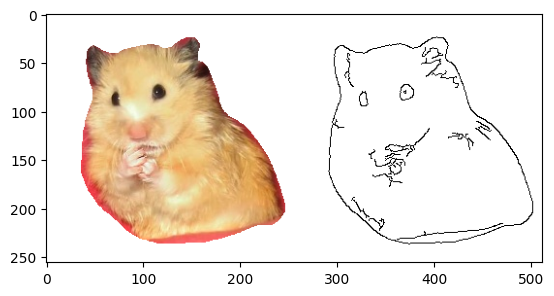

In [ ]:
all_files = tf.data.Dataset.list_files(f'{hamster_folder}/sketch/*.png')

# Calculate the number of files to take (50% of the dataset)
total_files = len(list(all_files.as_numpy_iterator()))
num_files_to_take = (int) ((total_files * 0.8) // 1)

# Take the first 50% of files
train_files = all_files.take(num_files_to_take)

# Prepare the training dataset
train_dataset = train_files.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)
# Display the length of the dataset
print(f"Length of training dataset: {len(list(train_files.as_numpy_iterator()))}")


In [ ]:
# List all files in the folder
test_dataset = all_files

# Count total files
total_files = test_dataset.cardinality().numpy()  # Get total count as an integer

# Calculate how many files to skip to keep only the last 10%
files_to_skip = int(total_files * 0.8)

# Skip the first 90% of the files
test_dataset = test_dataset.skip(files_to_skip)

# Load, process, and batch the dataset
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [ ]:
inp, re = load(str(f'{hamster_folder}/sketch/100.png'))
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)
gen_output = generator(inp[tf.newaxis, ...], training=False)
discriminator = Discriminator()
plt.imshow(gen_output[0, ...])

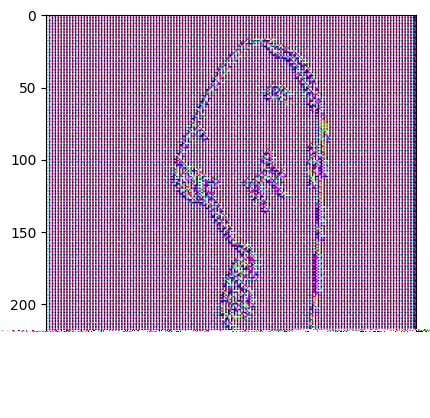

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

In [ ]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

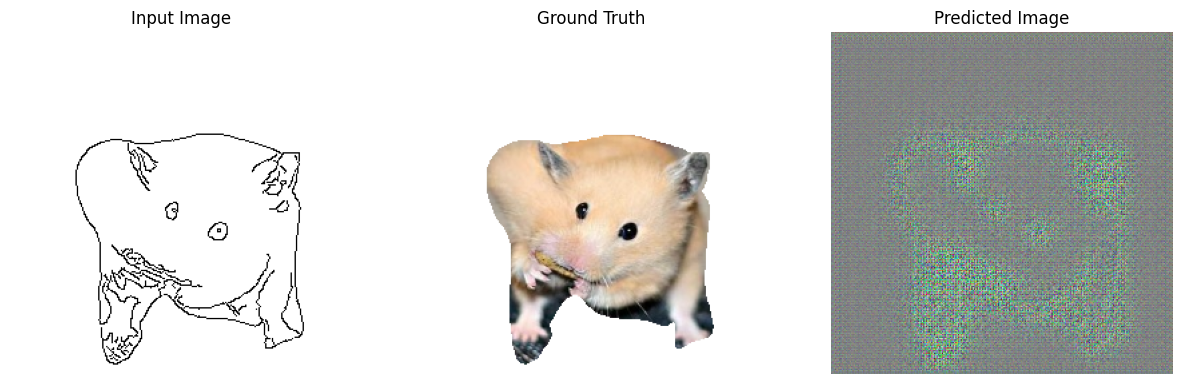

In [ ]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [ ]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)
    
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 50 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//50} * 50")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
#train model
fit(train_dataset, test_dataset, steps=10000)

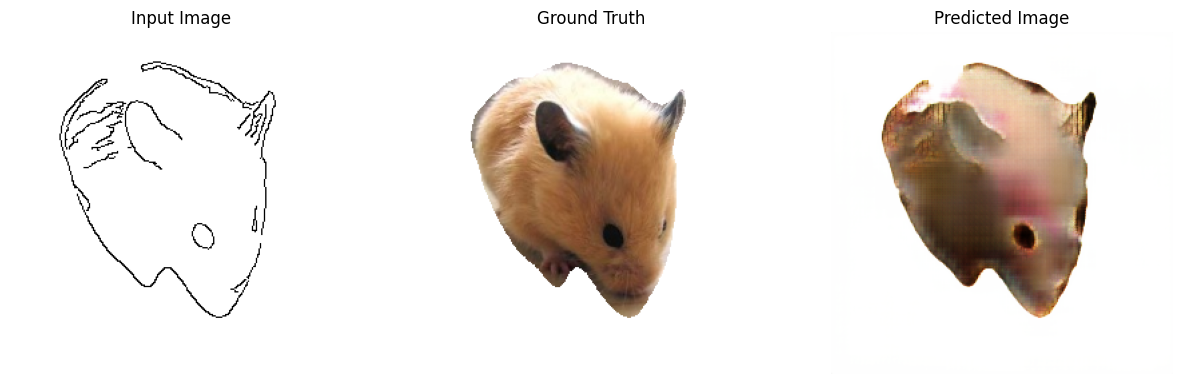

In [ ]:
input_image_path = "hamster.jpg"
input_image = tf.io.read_file(input_image_path)
input_image = tf.image.decode_jpeg(input_image)




input_image = tf.image.resize(input_image, [256, 256])
plt.imshow(input_image)  # Scale from [-1, 1] to [0, 1]
plt.axis('off')
plt.show()

input_image = tf.cast(input_image, tf.float32)
input_image = (input_image / 127.5) - 1
input_image = tf.expand_dims(input_image, axis=0)
inp = input_image

generate_images(generator, inp, inp)

### Model Evaluation
Through hyperparameter tuning I trained the model to generate the best cartoon hamster I could and the best realistic hamster. I show the best results along with what their counterpart looked like. The biggest limitation I encountered was there is no way for the model to determine what color a hamster should be. For example, If the training data contained 1,000 tan hamsters and 1,000 gray hamsters, the model would only generate a mixture of gray and tan instead of picking one. I countered this by deleting almost every image of hamsters that weren't tan.

## BEST CARTOON HAMSTER RESULT
This hamster was generated using the code above. the data is not overfit to actual hamsters, so the cartoon hamster is detectable as a hamster and doesn't look too creepy. Below it are some of the realistic hamsters it generated from the test data, which are rather plain but do the job. With more training steps I think these images could look a lot better. 

You can tell in the images how the model is mostly able to tell where the nose, ears, and eyes are.

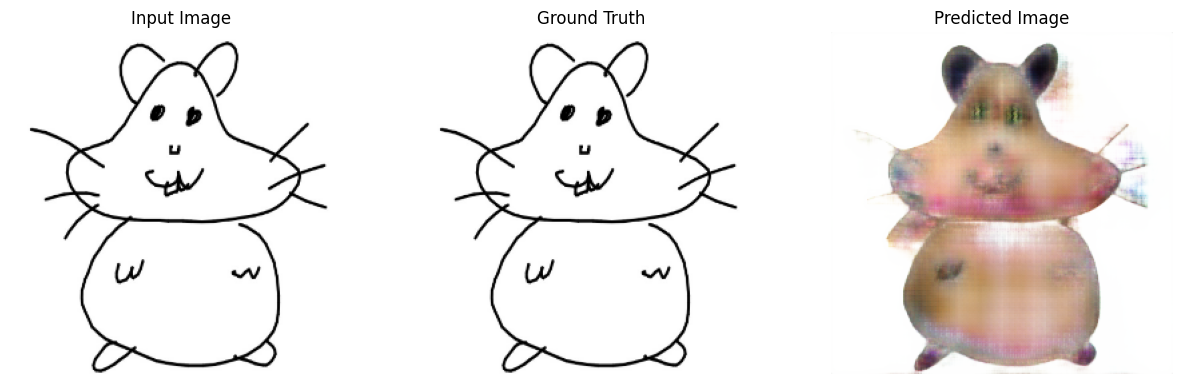
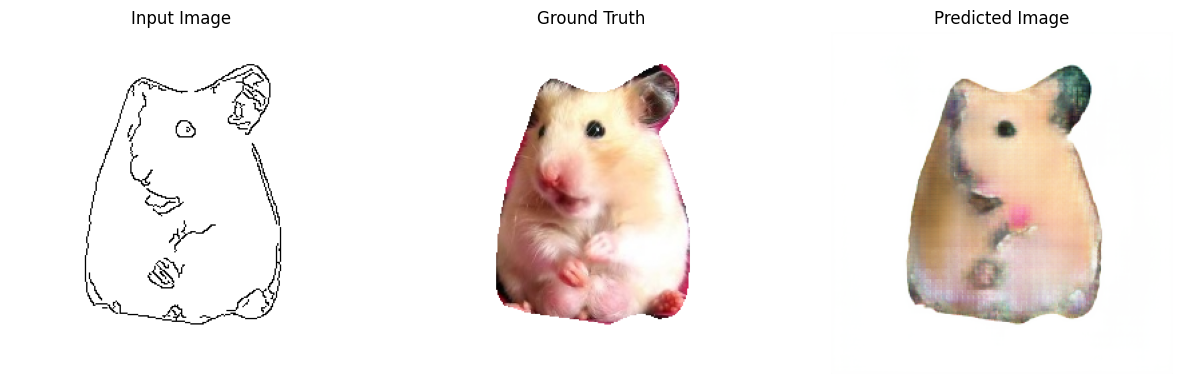
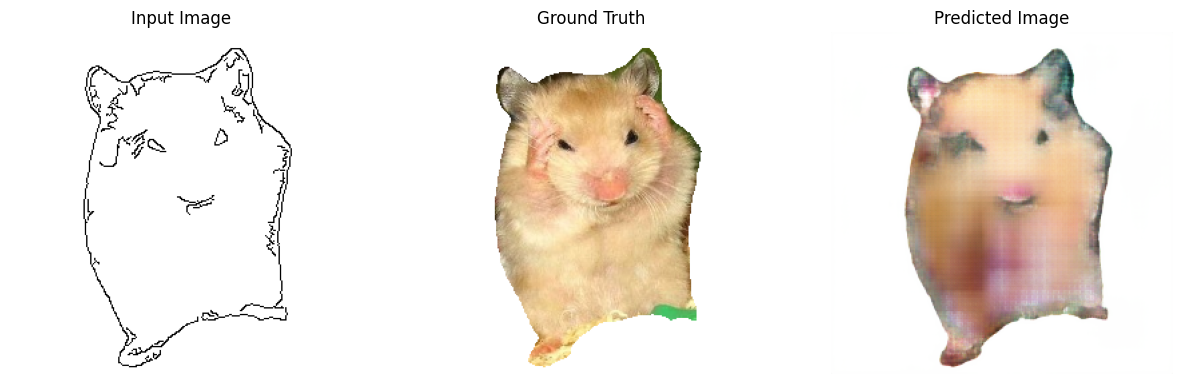

## BEST REAL HAMSTER RESULT (overfit data)
This training session used a large batch size, so while the model got very good at the images it was trained on, it didn't do so good with the cartoon.


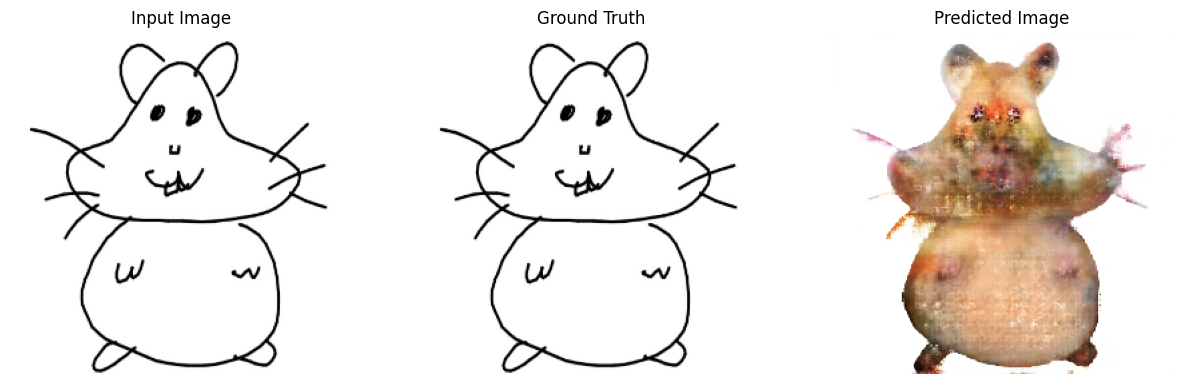
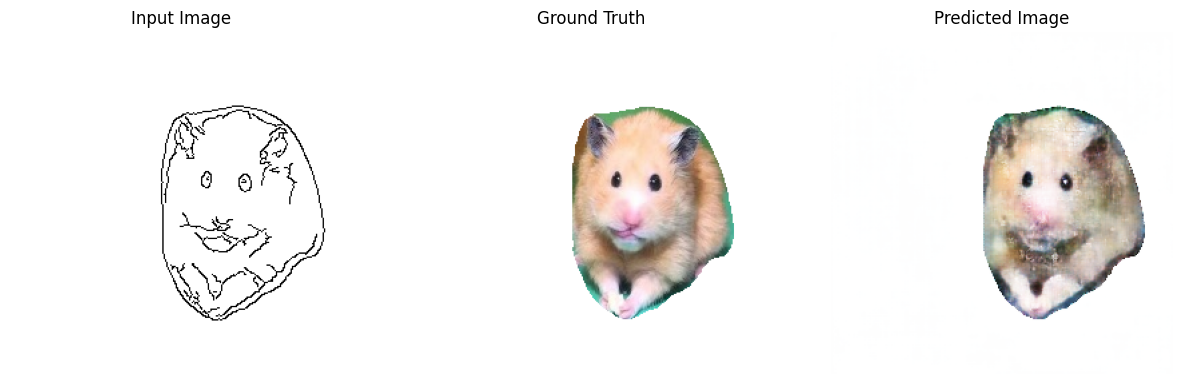
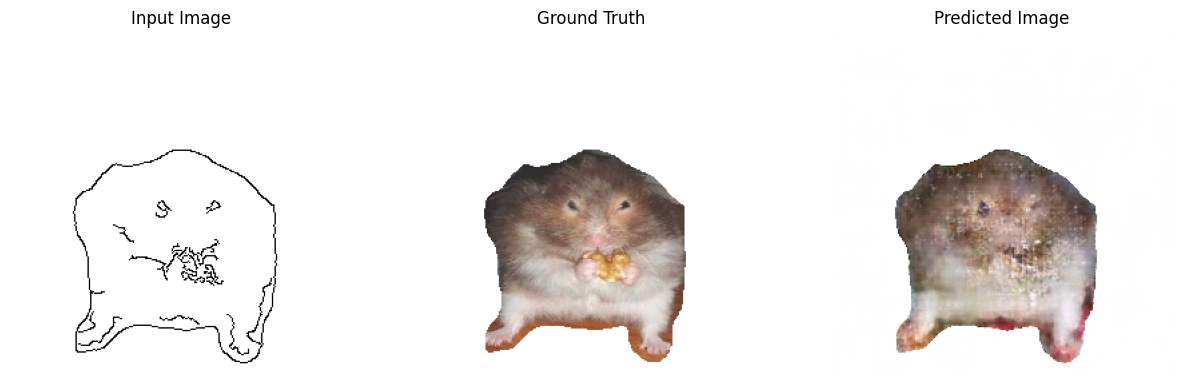